In [5]:
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np


In [6]:
iris= datasets.load_iris()

In [7]:
#print(iris.DESCR)

In [8]:
import pandas as pd

In [9]:
df= pd.DataFrame(iris['data'],columns=iris['feature_names'])

In [10]:
df['species']=iris.target

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


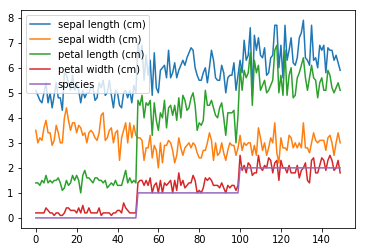

In [12]:
df.plot()

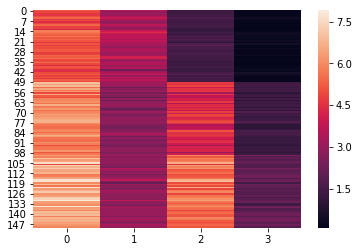

In [13]:
sns.heatmap(data=iris['data'])

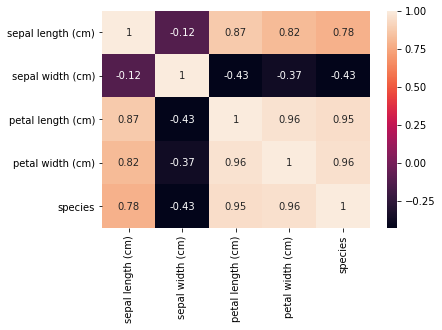

In [14]:
sns.heatmap(df.corr(),annot=True)

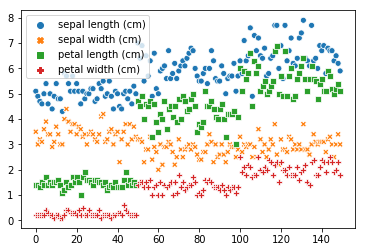

In [15]:
sns.scatterplot(data=df.drop('species',axis=1),hue='species')

In [16]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
real_x=df.iloc[:,:3].values
real_y=df.iloc[:,4].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(real_x, real_y, test_size=0.55, random_state=42)


In [20]:
from sklearn.svm import SVC

In [29]:
mod=SVC(kernel='linear',C=100,gamma=0.001)

In [30]:
mod.fit(X_train,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
pred=mod.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix,classification_report

In [33]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))


[[32  0  0]
 [ 0 26  0]
 [ 0  3 22]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.90      1.00      0.95        26
           2       1.00      0.88      0.94        25

   micro avg       0.96      0.96      0.96        83
   macro avg       0.97      0.96      0.96        83
weighted avg       0.97      0.96      0.96        83



In [40]:
from sklearn import metrics

In [46]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred, pos_label=1)


In [47]:
metrics.auc(fpr, tpr)

0.587719298245614

In [41]:
metrics.auc(y_test,pred)

ValueError: x is neither increasing nor decreasing : [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2
 1 1 2 1 0 1 2 0 0].